CS573100 Music Information Retrieval

DDL: 2023.5.9.

Description: Homework 2. Intrument and pitch classification.

Requirements:
1. Name you file as HW2_{student-id}.ipynb and submit to eeclass.
2. Strongly recommend writing the report on your jupyter notebook file.

In [3]:
#ip install mirdata
#conda install numpy
#pip install tensorflow
#conda install 
import librosa
import tensorflow as tf

1. Below is an example of TinySol1 dataset’s track ID annotation. Please explain the meaning of
this ID.  
Track ID: Cb-ord-A2-ff-1c-R100d：
Ans：
Cb:Contrabass
ord:played in the ordinary playing technique
A2:at pitch A2, 
ff:with fortissimo dynamics, 
1c:on the first string,
R100d：resampled from a A2 by lowering pitch by a semitone, i.e. 1000 cents (R1000d)


In [4]:
#import librosa
#import tensorflow as tf


# Load TinySOL metadata
# Import mirdata library
import mirdata

# Initialize tinysol dat

tinysol_dataset = mirdata.initialize("tinysol")
tinysol_dataset.download()

# Load tinysol metadata
tinysol_metadata = tinysol_dataset._metadata




INFO: Downloading ['audio', 'annotations'] to /tmp\mir_datasets\tinysol
INFO: [audio] downloading TinySOL.tar.gz
INFO: /tmp\mir_datasets\tinysol\audio\TinySOL.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: [annotations] downloading TinySOL_metadata.csv
INFO: /tmp\mir_datasets\tinysol\annotation\TinySOL_metadata.csv already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.


#### 2 Find an audio file you like and plot its spectrogram, mel-spectrogram, and MFCC using the

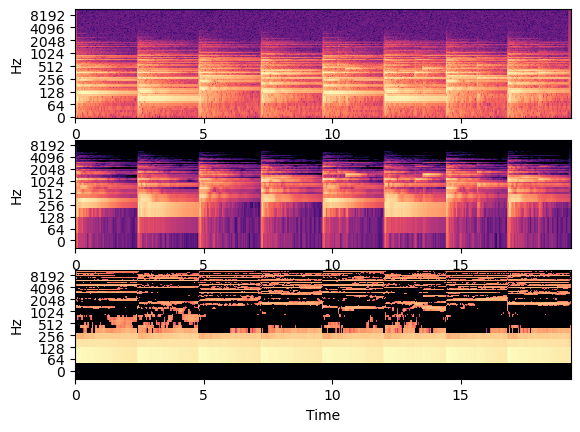

In [5]:
#2Find an audio file you like and plot its spectrogram, mel-spectrogram, and MFCC using the
import matplotlib.pyplot as plt
import librosa.feature as feature
import librosa.display as display

import numpy as np
#import matplotlib.pyplot as plt
audio_file = "soft-piano-100-bpm-121529.mp3"
audio,sr = librosa.load(audio_file)
hop_len = 512
window_len = 2048

D = np.abs(librosa.stft(audio, hop_length=hop_len,win_length=window_len))
plt.plot()
#spectrogram--------------------------------------------------------------------------
plt.subplot(3,1,1)
Spec_db = librosa.power_to_db(D , ref=np.max)
display.specshow(Spec_db, y_axis='log', sr=sr, hop_length=hop_len,
                        x_axis='time')
#plt.show()
#mel-spectrogram----------------------------------------------------------------------
plt.subplot(3,1,2)
S = feature.melspectrogram(y = audio,sr = sr,hop_length=hop_len,win_length=window_len)
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, y_axis='log', sr=sr, hop_length=hop_len,
                        x_axis='time')
#plt.show()
#MFCC---------------------------------------------------------------------------------
plt.subplot(3,1,3)
M = feature.mfcc(y=audio,sr=sr,n_mfcc = window_len)
M_dB = librosa.power_to_db(M, ref=np.max)
display.specshow(M_dB, y_axis='log', sr=sr, hop_length=hop_len,
                        x_axis='time')
plt.show()

#Feature Extraction

In [6]:
import numpy as np
# Create empty lists to store MFCC features and labels
mfccs_list = []
instrument_list = []
pitch_list = []

# Iterate through all the tracks in the dataset
for track_id in tinysol_dataset.track_ids:

  # Load a track by its ID
  track = tinysol_dataset.track(track_id)

  # Print some track information
  print("Track ID:", track.track_id)
  print("Instrument name:", track.instrument_full)
  print("Pitch class:", track.pitch)
  #print("Dynamics:", track.dynamics)

  # Load and play the audio file of the track
  audio, sr = track.audio
  #track.play_audio()

  # TODO:  IMPLEMENT FEATURE EXTRACTION
  feat = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50).T,axis=0)
  #print(feat.shape)
  # Append the MFCC features and labels to the lists
  mfccs_list.append(feat)
  instrument_list.append(track.instrument_full)
  pitch_list.append(track.pitch)






Track ID: BTb-ord-F#1-pp-N-N
Instrument name: Bass Tuba
Pitch class: F#1
Track ID: BTb-ord-G1-pp-N-R100u
Instrument name: Bass Tuba
Pitch class: G1
Track ID: BTb-ord-G#1-pp-N-T16u
Instrument name: Bass Tuba
Pitch class: G#1
Track ID: BTb-ord-A1-pp-N-T23d
Instrument name: Bass Tuba
Pitch class: A1
Track ID: BTb-ord-A#1-pp-N-N
Instrument name: Bass Tuba
Pitch class: A#1
Track ID: BTb-ord-B1-pp-N-N
Instrument name: Bass Tuba
Pitch class: B1
Track ID: BTb-ord-C2-pp-N-T13d
Instrument name: Bass Tuba
Pitch class: C2
Track ID: BTb-ord-C#2-pp-N-N
Instrument name: Bass Tuba
Pitch class: C#2
Track ID: BTb-ord-D2-pp-N-T18u
Instrument name: Bass Tuba
Pitch class: D2
Track ID: BTb-ord-D#2-pp-N-T11u
Instrument name: Bass Tuba
Pitch class: D#2
Track ID: BTb-ord-E2-pp-N-T25u
Instrument name: Bass Tuba
Pitch class: E2
Track ID: BTb-ord-F2-pp-N-T25u_R100u
Instrument name: Bass Tuba
Pitch class: F2
Track ID: BTb-ord-F#2-pp-N-T14u
Instrument name: Bass Tuba
Pitch class: F#2
Track ID: BTb-ord-G2-pp-N-N
Ins

In [7]:
# Convert the lists to numpy arrays for tensorflow compatibility[^2^][2] [^3^][3]
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)

#Encode labels

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
instrument_array = le.fit_transform(instrument_array)
instr_classes = le.classes_
print(instr_classes)
pitch_array = le.fit_transform(pitch_array)
pitch_classes = le.classes_
print(pitch_classes)

['Accordion' 'Alto Saxophone' 'Bass Tuba' 'Bassoon' 'Cello'
 'Clarinet in Bb' 'Contrabass' 'Flute' 'French Horn' 'Oboe' 'Trombone'
 'Trumpet in C' 'Viola' 'Violin']
['A#1' 'A#2' 'A#3' 'A#4' 'A#5' 'A#6' 'A#7' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6'
 'A7' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C#2' 'C#3' 'C#4' 'C#5' 'C#6'
 'C#7' 'C#8' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'D#2' 'D#3' 'D#4' 'D#5'
 'D#6' 'D#7' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'F#1' 'F#2' 'F#3' 'F#4' 'F#5' 'F#6' 'F#7' 'F1' 'F2' 'F3' 'F4' 'F5'
 'F6' 'F7' 'G#1' 'G#2' 'G#3' 'G#4' 'G#5' 'G#6' 'G#7' 'G1' 'G2' 'G3' 'G4'
 'G5' 'G6' 'G7']


#Split Training Set and Testing Set 

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_instrument, y_test_instrument, y_train_pitch, y_test_pitch = train_test_split(
    mfccs_array, instrument_array, pitch_array,test_size=0.2, random_state=23) # DON'T Modify Random_state!


In [11]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

##Instrument Classification

In [18]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import KFold
# decision tree
from sklearn import tree
#mlp
from sklearn.neural_network import MLPClassifier
from sklearn.base import clone

# Create a model for Intstrument Classification
svm_model_0 = SVC()
tree_model_0 = tree.DecisionTreeClassifier()
MLP_model_0 = MLPClassifier()
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
#best model----------
svm_best_score = 0
tree_best_score = 0
MLP_best_score = 0
svm_model = None
tree_model = None
MLP_model = None
#--------------------
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  #svm model-----------
  svm_model_0.fit(X_train_kfold, y_train_kfold_instrument)
  #decision tree model------------
  tree_model_0.fit(X_train_kfold, y_train_kfold_instrument)
  #MLP model----------------------
  MLP_model_0.fit(X_train_kfold, y_train_kfold_instrument)


  # TODO:　Evaluate your model  using the validation subset
  #svm
  predictions = svm_model_0.predict( X_val_kfold)
  score = accuracy_score(y_val_kfold_instrument, predictions)
  print("SVM Validation score:", score)
  if(score > svm_best_score):
    svm_model = svm_model_0
    svm_best_score = score

  #decision tree
  predictions = tree_model_0.predict( X_val_kfold)
  score = accuracy_score(y_val_kfold_instrument, predictions)
  print("decision tree Validation score:", score)
  if(score > tree_best_score):
    tree_model = tree_model_0
    tree_best_score = score
  #MLP
  predictions = MLP_model_0.predict( X_val_kfold)
  score = accuracy_score(y_val_kfold_instrument, predictions)
  print("MLP Validation score:", score)
  if(score > MLP_best_score):
    MLP_model = MLP_model_0
    MLP_best_score = score

# TODO: Evaluate your model using the test set
predictions = svm_model.predict(X_test)
test_score = accuracy_score(y_test_instrument,predictions)
print("SVM Test score:", test_score)

predictions = tree_model.predict(X_test)
test_score = accuracy_score(y_test_instrument,predictions)
print("Decision Tree Test score:", test_score)

predictions = MLP_model.predict(X_test)
test_score = accuracy_score(y_test_instrument,predictions)
print("MLP Test score:", test_score)

c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Validation score: 0.6580976863753213
decision tree Validation score: 0.781491002570694
MLP Validation score: 0.9305912596401028
SVM Validation score: 0.6323907455012854
decision tree Validation score: 0.7763496143958869
MLP Validation score: 0.9485861182519281


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Validation score: 0.6391752577319587
decision tree Validation score: 0.7809278350515464
MLP Validation score: 0.9484536082474226


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Validation score: 0.6752577319587629
decision tree Validation score: 0.8273195876288659
MLP Validation score: 0.9587628865979382


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Validation score: 0.6030927835051546
decision tree Validation score: 0.7963917525773195
MLP Validation score: 0.9072164948453608


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Validation score: 0.6262886597938144
decision tree Validation score: 0.7396907216494846
MLP Validation score: 0.9175257731958762
SVM Test score: 0.6483704974271012
Decision Tree Test score: 0.7838765008576329
MLP Test score: 0.9210977701543739


SVM--------------------------
Confusion matrix


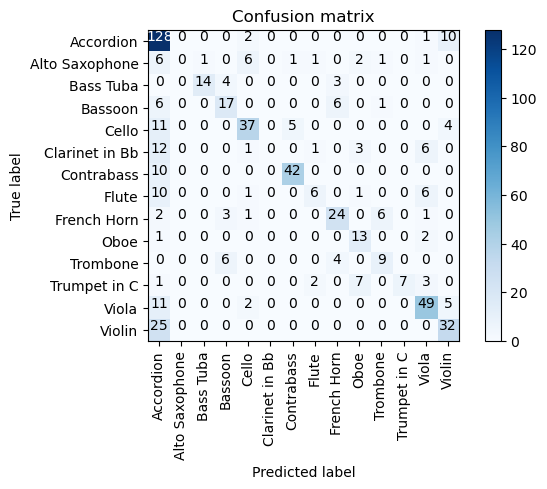

ACC =  0.648
precision =  0.648
recall =  0.648
Decision tree--------------------------
Confusion matrix


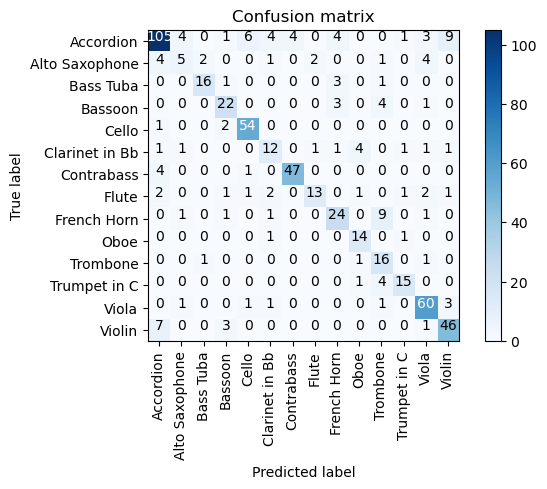

ACC =  0.77
precision =  0.77
recall =  0.77
MLP--------------------------
Confusion matrix


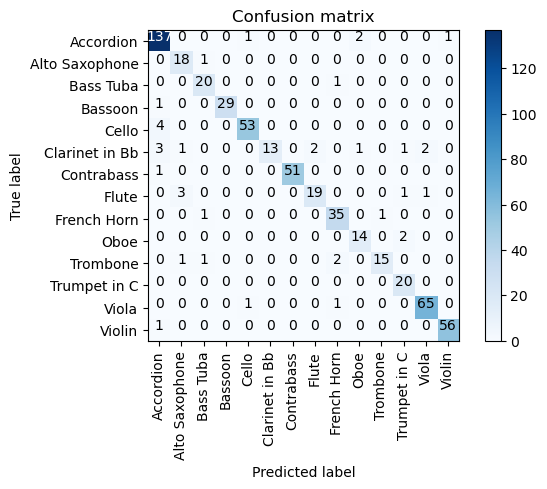

ACC =  0.935
precision =  0.935
recall =  0.935


In [14]:
y_pred_instr = svm_model.predict(X_test)
print("SVM--------------------------")
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))
print("Decision tree--------------------------")
y_pred_instr = tree_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))
print("MLP--------------------------")
y_pred_instr = MLP_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

##Pitch Classification

In [15]:
# Create a model for Pitch Classification
#svm---
svm_pitch_0 = SVC()
#decision tree
tree_pitch_0 = tree.DecisionTreeClassifier()
#mlp
MLP_pitch_0 = MLPClassifier()
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
#best model----------
svm_best_score = 0
tree_best_score = 0
MLP_best_score = 0
svm_pitch = None
tree_pitch = None
MLP_pitch = None
#--------------------
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  
  # TODO: Train your model using the train subset
  svm_pitch_0.fit(X_train_kfold,y_train_kfold_pitch)
  tree_pitch_0.fit(X_train_kfold,y_train_kfold_pitch)
  MLP_pitch_0.fit(X_train_kfold,y_train_kfold_pitch)
  #-----------------------------------------------


  # TODO:　Evaluate your model  using the validation subset
  prediction = svm_pitch_0.predict(X_val_kfold)
  score = accuracy_score(y_val_kfold_pitch,prediction)
  print("svm Validation score:", score)
  if(score>svm_best_score):
    svm_pitch = svm_pitch_0
    svm_best_score = score


  prediction = tree_pitch_0.predict(X_val_kfold)
  score = accuracy_score(y_val_kfold_pitch,prediction)
  print("dicision tree Validation score:", score)
  if(score>tree_best_score):
      tree_pitch = tree_pitch_0
      tree_best_score = score

  prediction = MLP_pitch_0.predict(X_val_kfold)
  score = accuracy_score(y_val_kfold_pitch,prediction)
  print("MLP Validation score:", score)
  if(score>MLP_best_score):
    MLP_pitch = MLP_pitch_0
    MLP_best_score = score
  #------------------------------------------------------
# TODO: Evaluate the model on the instrument label using the test set
prediction = svm_pitch.predict(X_val_kfold)
test_score = accuracy_score(y_val_kfold_pitch,prediction)
print("svm Test score:", test_score)

prediction = tree_pitch.predict(X_val_kfold)
test_score = accuracy_score(y_val_kfold_pitch,prediction)
print("Dicision tree Test score:", test_score)

prediction = MLP_pitch.predict(X_val_kfold)
test_score = accuracy_score(y_val_kfold_pitch,prediction)
print("MLP Test score:", test_score)

svm Validation score: 0.6426735218508998
dicision tree Validation score: 0.7043701799485861
MLP Validation score: 0.8380462724935732


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


svm Validation score: 0.6272493573264781
dicision tree Validation score: 0.7403598971722365
MLP Validation score: 0.8586118251928021
svm Validation score: 0.6108247422680413
dicision tree Validation score: 0.7319587628865979
MLP Validation score: 0.8530927835051546
svm Validation score: 0.5721649484536082
dicision tree Validation score: 0.7628865979381443
MLP Validation score: 0.845360824742268


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


svm Validation score: 0.6391752577319587
dicision tree Validation score: 0.7628865979381443
MLP Validation score: 0.8917525773195877


c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


svm Validation score: 0.6134020618556701
dicision tree Validation score: 0.7422680412371134
MLP Validation score: 0.8402061855670103
svm Test score: 0.6134020618556701
Dicision tree Test score: 0.7422680412371134
MLP Test score: 0.8402061855670103


In [16]:
y_pred_pitch = svm_pitch.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average=None) #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average=None)
cm = confusion_matrix(y_test_pitch, y_pred_pitch,labels=np.arange(0, 82))
plot_confusion_matrix(cm , pitch_classes,labels=np.arange(0, 82))

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)
#----------------------------------------------------
y_pred_pitch = tree_pitch.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average=None) #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average=None)
cm = confusion_matrix(y_test_pitch, y_pred_pitch,labels=np.arange(0, 82))
plot_confusion_matrix(cm , pitch_classes,labels=np.arange(0, 82))

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)

#----------------------------------------------------
y_pred_pitch = MLP_pitch.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average=None) #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average=None)
cm = confusion_matrix(y_test_pitch, y_pred_pitch,labels=np.arange(0, 82))
plot_confusion_matrix(cm , pitch_classes,labels=np.arange(0, 82))

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)

c:\Users\s0953\Anaconda3\envs\mir\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: plot_confusion_matrix() got an unexpected keyword argument 'labels'

In [ ]:
#bonus
from sklearn.model_selection import GridSearchCV

